In [307]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from  sklearn.ensemble import GradientBoostingClassifier
import joblib

In [194]:
data = pd.read_csv("Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [195]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [196]:
data.shape

(10000, 14)

In [197]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 10000
Number of Columns 14


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [199]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [200]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [201]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [202]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [203]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [204]:
 data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [205]:
data = pd.get_dummies(data,drop_first=True) 

In [206]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [207]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

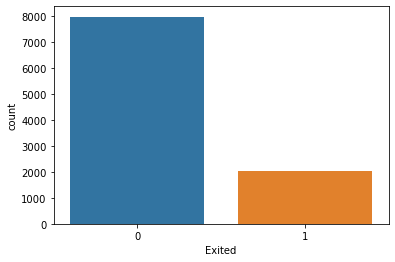

In [208]:
sns.countplot(data['Exited'])
import warnings
warnings.filterwarnings('ignore')

In [209]:
X = data.drop('Exited',axis=1)
y = data['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [210]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [211]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [212]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42,)

In [213]:
sc = StandardScaler()

In [214]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [215]:
X_train

array([[ 0.00221726,  1.20698492,  1.17796054, ..., -0.56526415,
        -0.46375548, -0.84592781],
       [ 1.09202592,  0.10113182, -1.39176845, ..., -0.56526415,
        -0.46375548,  1.18213397],
       [-1.12028567,  0.20166392,  0.44375226, ...,  1.76908441,
        -0.46375548, -0.84592781],
       ...,
       [ 0.19838282,  0.20166392,  1.17796054, ..., -0.56526415,
        -0.46375548,  1.18213397],
       [-0.89142585, -0.60259288, -1.39176845, ...,  1.76908441,
        -0.46375548, -0.84592781],
       [ 0.52532542,  1.00592072, -1.39176845, ...,  1.76908441,
        -0.46375548,  1.18213397]])

In [216]:
log = LogisticRegression()

In [217]:
log.fit(X_train,y_train)

LogisticRegression()

In [218]:
y_pred1 = log.predict(X_test)

In [219]:
accuracy_score(y_test,y_pred1)

0.788135593220339

In [220]:
precision_score(y_test,y_pred1)

0.7726708074534161

In [221]:
recall_score(y_test,y_pred1)

0.8010302640051513

In [222]:
f1_score(y_test,y_pred1)

0.7865950047423332

In [235]:
svm = svm.SVC()

In [236]:
svm.fit(X_train,y_train)

SVC()

In [237]:
y_pred2 = svm.predict(X_test)

In [238]:
accuracy_score(y_test,y_pred2)

0.8430634023854363

In [228]:
precision_score(y_test,y_pred2)

0.8305084745762712

In [239]:
recall_score(y_test,y_pred2)

0.8518995492594977

In [240]:
f1_score(y_test,y_pred2)

0.8410680228862046

In [244]:
knn = KNeighborsClassifier()

In [245]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [248]:
y_pred3 = knn.predict(X_test)

In [249]:
accuracy_score(y_test,y_pred3)

0.8217200251098556

In [251]:
precision_score(y_test,y_pred3)

0.7961515333734215

In [256]:
dt = DecisionTreeClassifier()

In [257]:
dt.fit (X_train,y_train)

DecisionTreeClassifier()

In [258]:
y_pred4 = dt.predict(X_test)

In [259]:
accuracy_score(y_test,y_pred4)

0.7975517890772128

In [260]:
precision_score(y_test,y_pred4)

0.7788697788697788

In [275]:
rf = RandomForestClassifier()

In [276]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [278]:
y_pred5 = rf.predict(X_test)

In [279]:
accuracy_score(y_test,y_pred5)

0.8647206528562461

In [281]:
precision_score(y_test,y_pred5)

0.8497506234413965

In [284]:
gb = GradientBoostingClassifier()

In [285]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [286]:
y_pred6 = gb.predict(X_test)

In [288]:
accuracy_score(y_test,y_pred6)

0.8462021343377275

In [289]:
precision_score(y_test,y_pred6)

0.83575489576753

In [293]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                           'Accuracy':[accuracy_score(y_test,y_pred1),
                                 accuracy_score(y_test,y_pred2),
                                 accuracy_score(y_test,y_pred3),
                                 accuracy_score(y_test,y_pred4),
                                 accuracy_score(y_test,y_pred5),
                                 accuracy_score(y_test,y_pred6)]})

In [294]:
final_data

,Models,Accuracy
0,LR,0.788136
1,SVC,0.843063
2,KNN,0.821720
3,DT,0.797552
4,RF,0.864721
5,GB,0.846202


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

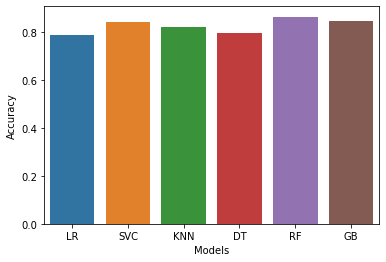

In [296]:
sns.barplot(final_data['Models'],final_data['Accuracy'])

In [302]:
final_data1 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GB'],
                           'Precision':[precision_score(y_test,y_pred1),
                                        precision_score(y_test,y_pred2),
                                        precision_score(y_test,y_pred3),
                                        precision_score(y_test,y_pred4),
                                        precision_score(y_test,y_pred5),
                                        precision_score(y_test,y_pred6)]})

In [303]:
final_data1

,Models,Precision
0,LR,0.772671
1,SVC,0.830508
2,KNN,0.796152
3,DT,0.778870
4,RF,0.849751
5,GB,0.835755


<AxesSubplot:xlabel='Models', ylabel='Precision'>

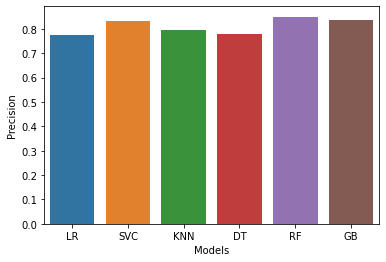

In [304]:
sns.barplot(final_data['Models'],final_data['Precision'])

In [305]:
X_res = sc.fit_transform(X_res)

In [306]:
rf.fit(X_res,y_res)

RandomForestClassifier()

In [308]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [309]:
model = joblib.load('churn_predict_model')

In [311]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [312]:
model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]])

array([1], dtype=int64)